In [1]:
import os
os.chdir("C:\\Users\\lenovo\\Downloads")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the dataset

sms_data = pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
# head of the data

sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# shape of the data

sms_data.shape

(5572, 5)

In [5]:
sms_data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
sms_data.groupby('v1').describe()

v2                                                                 \
     count unique                                                top freq   
v1                                                                          
ham   4825   4516                             Sorry, I'll call later   30   
spam   747    653  Please call our customer service representativ...    4   

     Unnamed: 2                                                            \
          count unique                                                top   
v1                                                                          
ham          45     39   bt not his girlfrnd... G o o d n i g h t . . .@"   
spam          5      4                                        PO Box 5249   

          Unnamed: 3                                    Unnamed: 4         \
     freq      count unique                    top freq      count unique   
v1                                                                          
ham     3         10      9                     GE    2          6      5   
spam    2          2      1   MK17 92H. 450Ppw 16"    2          0      0   

                    
          top freq  
v1                  
ham   GNT:-)"    2  
spam      NaN  NaN

In [7]:
sms_data['length'] = sms_data['v2'].apply(len)

In [8]:
# Data Visualization

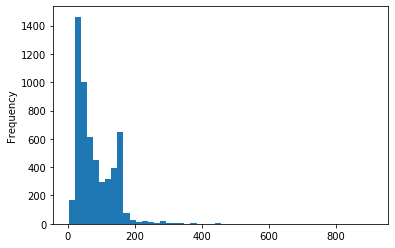

In [9]:
sms_data['length'].plot(bins=50, kind='hist')

In [10]:
sms_data.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [11]:
sms_data[sms_data['length'] == 910]['v2'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D0DBF0C048>,
      dtype=object)

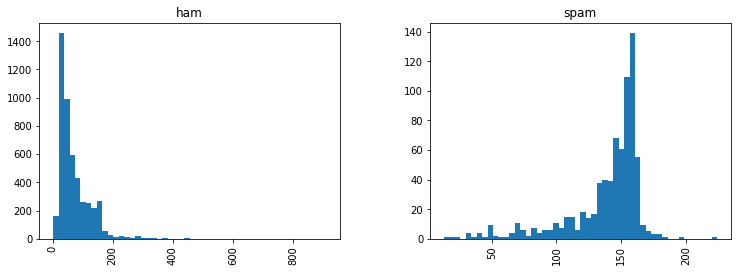

In [12]:
sms_data.hist(column='length', by='v1', bins=50,figsize=(12,4))

In [13]:
# We drop the last four columns as the last three columns don't have any values and we don't need length column.

In [14]:
sms_data.drop(labels = ['Unnamed: 2','Unnamed: 3','Unnamed: 4','length'],axis = 1,inplace = True)

In [15]:
sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [17]:
stemming = PorterStemmer()
corpus = []
for i in range (0,len(sms_data)):
    s1 = re.sub('[^a-zA-Z]',repl = ' ',string = sms_data['v2'][i])
    s1.lower()
    s1 = s1.split()
    s1 = [stemming.stem(word) for word in s1 if word not in set(stopwords.words('english'))]
    s1 = ' '.join(s1)
    corpus.append(s1)

In [18]:
corpus[1]

'Ok lar joke wif u oni'

In [19]:
len(corpus)

5572

In [20]:
# Using CountVectorizer we tokenize and vectorize the words and create a sparse matrix.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
countvectorizer = CountVectorizer()

In [22]:
x = countvectorizer.fit_transform(corpus).toarray()

In [23]:
y = sms_data['v1'].values

In [24]:
x.shape

(5572, 6304)

In [25]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
print(y)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [27]:
# Splitting train and test data.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, stratify=y,random_state=100)

In [30]:
# Using MultinomialNB to classify the message

In [31]:
from sklearn.naive_bayes import MultinomialNB
multinomialnb = MultinomialNB()

In [32]:
multinomialnb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
y_pred = multinomialnb.predict(x_test)

In [34]:
y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype='<U4')

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
# Classification Report

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1448
        spam       0.91      0.95      0.93       224

    accuracy                           0.98      1672
   macro avg       0.95      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [38]:
# Confusion Matrix

In [39]:
confusion_matrix(y_test,y_pred)

array([[1426,   22],
       [  11,  213]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
# Accuracy Score

In [42]:
accuracy_score(y_test,y_pred)

0.9802631578947368

In [43]:
# Using SVM to classify the message

In [44]:
from sklearn.svm import LinearSVC
linearsvc = LinearSVC()

In [45]:
linearsvc.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [46]:
y_pred = linearsvc.predict(x_test)

In [47]:
y_pred

array(['ham', 'ham', 'ham', ..., 'spam', 'ham', 'ham'], dtype=object)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1448
        spam       0.99      0.89      0.93       224

    accuracy                           0.98      1672
   macro avg       0.98      0.94      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [49]:
confusion_matrix(y_test,y_pred)

array([[1445,    3],
       [  25,  199]], dtype=int64)

In [50]:
accuracy_score(y_test,y_pred)

0.9832535885167464